In [52]:
import sys                             # system module 
import pandas as pd                    # data package
import matplotlib.pyplot as plt        # graphics module  
import datetime as dt                  # date and time module
import numpy as np                     # foundation for pandas 

%matplotlib inline                     

The first step is to load in the fighter data showing every mma fighter up to 2016 and their home country. We will later combine this data with our other dataset on fights.

In [53]:
names = 'C:/Users/Benjamin Robson/Documents/UFC_fighters_name_location.csv'
ufc_names = pd.read_csv(names)               # tab (\t) separated values 
ufc_names

,name,country
0,Conor McGregor,Ireland
1,Jon Jones,United States
2,Holly Holm,United States
3,Dominick Cruz,United States
4,Demetrious Johnson,United States
5,Ronda Rousey,United States
6,Fabricio Werdum,Brazil
7,Robbie Lawler,United States
8,Jose Aldo,Brazil
9,Chad Mendes,United States


In [101]:
ufc_names['country'] = ufc_names['country'].replace({"USA": "United States", "Holland":"Netherlands"})

In [102]:
fights = 'C:/Users/Benjamin Robson/Documents/all_ufc_fights.csv'
ufc_fights = pd.read_csv(fights)
ufc_fights

,pageurl,eid,mid,event_name,event_org,event_date,event_place,f1pageurl,f2pageurl,f1name,f2name,f1result,f2result,f1fid,f2fid,method,method_d,ref,round,time
0,/events/UFC-1-The-Beginning-7,7,8,UFC 1 - The Beginning,Ultimate Fighting Championship,11/12/1993,"McNichols Arena, Denver, Colorado, United States",/fighter/Royce-Gracie-19,/fighter/Gerard-Gordeau-15,Royce Gracie,Gerard Gordeau,win,loss,19,15,Submission,Rear-Naked Choke,Helio Vigio,1,1:44
1,/events/UFC-1-The-Beginning-7,7,7,UFC 1 - The Beginning,Ultimate Fighting Championship,11/12/1993,"McNichols Arena, Denver, Colorado, United States",/fighter/Jason-DeLucia-22,/fighter/Trent-Jenkins-23,Jason DeLucia,Trent Jenkins,win,loss,22,23,Submission,Rear-Naked Choke,Joao Alberto Barreto,1,0:52
2,/events/UFC-1-The-Beginning-7,7,6,UFC 1 - The Beginning,Ultimate Fighting Championship,11/12/1993,"McNichols Arena, Denver, Colorado, United States",/fighter/Royce-Gracie-19,/fighter/Ken-Shamrock-4,Royce Gracie,Ken Shamrock,win,loss,19,4,Submission,Rear-Naked Choke,Helio Vigio,1,0:57
3,/events/UFC-1-The-Beginning-7,7,5,UFC 1 - The Beginning,Ultimate Fighting Championship,11/12/1993,"McNichols Arena, Denver, Colorado, United States",/fighter/Gerard-Gordeau-15,/fighter/Kevin-Rosier-17,Gerard Gordeau,Kevin Rosier,win,loss,15,17,TKO,Corner Stoppage,Joao Alberto Barreto,1,0:59
4,/events/UFC-1-The-Beginning-7,7,4,UFC 1 - The Beginning,Ultimate Fighting Championship,11/12/1993,"McNichols Arena, Denver, Colorado, United States",/fighter/Ken-Shamrock-4,/fighter/Patrick-Smith-21,Ken Shamrock,Patrick Smith,win,loss,4,21,Submission,Heel Hook,Helio Vigio,1,1:49
5,/events/UFC-1-The-Beginning-7,7,3,UFC 1 - The Beginning,Ultimate Fighting Championship,11/12/1993,"McNichols Arena, Denver, Colorado, United States",/fighter/Royce-Gracie-19,/fighter/Art-Jimmerson-20,Royce Gracie,Art Jimmerson,win,loss,19,20,Submission,Smother Choke,Joao Alberto Barreto,1,2:18
6,/events/UFC-1-The-Beginning-7,7,2,UFC 1 - The Beginning,Ultimate Fighting Championship,11/12/1993,"McNichols Arena, Denver, Colorado, United States",/fighter/Kevin-Rosier-17,/fighter/Zane-Frazier-18,Kevin Rosier,Zane Frazier,win,loss,17,18,TKO,Punches,Helio Vigio,1,4:20
7,/events/UFC-1-The-Beginning-7,7,1,UFC 1 - The Beginning,Ultimate Fighting Championship,11/12/1993,"McNichols Arena, Denver, Colorado, United States",/fighter/Gerard-Gordeau-15,/fighter/Teila-Tuli-16,Gerard Gordeau,Teila Tuli,win,loss,15,16,TKO,Head Kick,Joao Alberto Barreto,1,0:26
8,/events/UFC-2-No-Way-Out-8,8,15,UFC 2 - No Way Out,Ultimate Fighting Championship,3/11/1994,"Fillmore Auditorium, Denver, Colorado, United ...",/fighter/Royce-Gracie-19,/fighter/Patrick-Smith-21,Royce Gracie,Patrick Smith,win,loss,19,21,Submission,Punches,John McCarthy,1,1:17
9,/events/UFC-2-No-Way-Out-8,8,14,UFC 2 - No Way Out,Ultimate Fighting Championship,3/11/1994,"Fillmore Auditorium, Denver, Colorado, United ...",/fighter/Royce-Gracie-19,/fighter/Remco-Pardoel-33,Royce Gracie,Remco Pardoel,win,loss,19,33,Submission,Lapel Choke,John McCarthy,1,1:31


In [103]:
ufc_names1 = ufc_names.rename(columns={'name': 'f1name','country': 'f1country' })

In [104]:
ufc_names1 = ufc_names1.drop_duplicates(subset='f1name')

In [105]:
ufc_names2 = ufc_names.rename(columns={'name': 'f2name', 'country': 'f2country'})

In [106]:
ufc_names2 = ufc_names2.drop_duplicates(subset='f2name')

In [107]:
ufc1 = pd.merge(ufc_fights, ufc_names1, on='f1name', how = 'left').drop_duplicates()
ufc1

,pageurl,eid,mid,event_name,event_org,event_date,event_place,f1pageurl,f2pageurl,f1name,...,f1result,f2result,f1fid,f2fid,method,method_d,ref,round,time,f1country
0,/events/UFC-1-The-Beginning-7,7,8,UFC 1 - The Beginning,Ultimate Fighting Championship,11/12/1993,"McNichols Arena, Denver, Colorado, United States",/fighter/Royce-Gracie-19,/fighter/Gerard-Gordeau-15,Royce Gracie,...,win,loss,19,15,Submission,Rear-Naked Choke,Helio Vigio,1,1:44,Brazil
1,/events/UFC-1-The-Beginning-7,7,7,UFC 1 - The Beginning,Ultimate Fighting Championship,11/12/1993,"McNichols Arena, Denver, Colorado, United States",/fighter/Jason-DeLucia-22,/fighter/Trent-Jenkins-23,Jason DeLucia,...,win,loss,22,23,Submission,Rear-Naked Choke,Joao Alberto Barreto,1,0:52,United States
2,/events/UFC-1-The-Beginning-7,7,6,UFC 1 - The Beginning,Ultimate Fighting Championship,11/12/1993,"McNichols Arena, Denver, Colorado, United States",/fighter/Royce-Gracie-19,/fighter/Ken-Shamrock-4,Royce Gracie,...,win,loss,19,4,Submission,Rear-Naked Choke,Helio Vigio,1,0:57,Brazil
3,/events/UFC-1-The-Beginning-7,7,5,UFC 1 - The Beginning,Ultimate Fighting Championship,11/12/1993,"McNichols Arena, Denver, Colorado, United States",/fighter/Gerard-Gordeau-15,/fighter/Kevin-Rosier-17,Gerard Gordeau,...,win,loss,15,17,TKO,Corner Stoppage,Joao Alberto Barreto,1,0:59,Netherlands
4,/events/UFC-1-The-Beginning-7,7,4,UFC 1 - The Beginning,Ultimate Fighting Championship,11/12/1993,"McNichols Arena, Denver, Colorado, United States",/fighter/Ken-Shamrock-4,/fighter/Patrick-Smith-21,Ken Shamrock,...,win,loss,4,21,Submission,Heel Hook,Helio Vigio,1,1:49,United States
5,/events/UFC-1-The-Beginning-7,7,3,UFC 1 - The Beginning,Ultimate Fighting Championship,11/12/1993,"McNichols Arena, Denver, Colorado, United States",/fighter/Royce-Gracie-19,/fighter/Art-Jimmerson-20,Royce Gracie,...,win,loss,19,20,Submission,Smother Choke,Joao Alberto Barreto,1,2:18,Brazil
6,/events/UFC-1-The-Beginning-7,7,2,UFC 1 - The Beginning,Ultimate Fighting Championship,11/12/1993,"McNichols Arena, Denver, Colorado, United States",/fighter/Kevin-Rosier-17,/fighter/Zane-Frazier-18,Kevin Rosier,...,win,loss,17,18,TKO,Punches,Helio Vigio,1,4:20,United States
7,/events/UFC-1-The-Beginning-7,7,1,UFC 1 - The Beginning,Ultimate Fighting Championship,11/12/1993,"McNichols Arena, Denver, Colorado, United States",/fighter/Gerard-Gordeau-15,/fighter/Teila-Tuli-16,Gerard Gordeau,...,win,loss,15,16,TKO,Head Kick,Joao Alberto Barreto,1,0:26,Netherlands
8,/events/UFC-2-No-Way-Out-8,8,15,UFC 2 - No Way Out,Ultimate Fighting Championship,3/11/1994,"Fillmore Auditorium, Denver, Colorado, United ...",/fighter/Royce-Gracie-19,/fighter/Patrick-Smith-21,Royce Gracie,...,win,loss,19,21,Submission,Punches,John McCarthy,1,1:17,Brazil
9,/events/UFC-2-No-Way-Out-8,8,14,UFC 2 - No Way Out,Ultimate Fighting Championship,3/11/1994,"Fillmore Auditorium, Denver, Colorado, United ...",/fighter/Royce-Gracie-19,/fighter/Remco-Pardoel-33,Royce Gracie,...,win,loss,19,33,Submission,Lapel Choke,John McCarthy,1,1:31,Brazil


In [108]:
ufc_final = pd.merge(ufc1, ufc_names2, on='f2name', how = 'left').drop_duplicates()
ufc_final

,pageurl,eid,mid,event_name,event_org,event_date,event_place,f1pageurl,f2pageurl,f1name,...,f2result,f1fid,f2fid,method,method_d,ref,round,time,f1country,f2country
0,/events/UFC-1-The-Beginning-7,7,8,UFC 1 - The Beginning,Ultimate Fighting Championship,11/12/1993,"McNichols Arena, Denver, Colorado, United States",/fighter/Royce-Gracie-19,/fighter/Gerard-Gordeau-15,Royce Gracie,...,loss,19,15,Submission,Rear-Naked Choke,Helio Vigio,1,1:44,Brazil,Netherlands
1,/events/UFC-1-The-Beginning-7,7,7,UFC 1 - The Beginning,Ultimate Fighting Championship,11/12/1993,"McNichols Arena, Denver, Colorado, United States",/fighter/Jason-DeLucia-22,/fighter/Trent-Jenkins-23,Jason DeLucia,...,loss,22,23,Submission,Rear-Naked Choke,Joao Alberto Barreto,1,0:52,United States,United States
2,/events/UFC-1-The-Beginning-7,7,6,UFC 1 - The Beginning,Ultimate Fighting Championship,11/12/1993,"McNichols Arena, Denver, Colorado, United States",/fighter/Royce-Gracie-19,/fighter/Ken-Shamrock-4,Royce Gracie,...,loss,19,4,Submission,Rear-Naked Choke,Helio Vigio,1,0:57,Brazil,United States
3,/events/UFC-1-The-Beginning-7,7,5,UFC 1 - The Beginning,Ultimate Fighting Championship,11/12/1993,"McNichols Arena, Denver, Colorado, United States",/fighter/Gerard-Gordeau-15,/fighter/Kevin-Rosier-17,Gerard Gordeau,...,loss,15,17,TKO,Corner Stoppage,Joao Alberto Barreto,1,0:59,Netherlands,United States
4,/events/UFC-1-The-Beginning-7,7,4,UFC 1 - The Beginning,Ultimate Fighting Championship,11/12/1993,"McNichols Arena, Denver, Colorado, United States",/fighter/Ken-Shamrock-4,/fighter/Patrick-Smith-21,Ken Shamrock,...,loss,4,21,Submission,Heel Hook,Helio Vigio,1,1:49,United States,United States
5,/events/UFC-1-The-Beginning-7,7,3,UFC 1 - The Beginning,Ultimate Fighting Championship,11/12/1993,"McNichols Arena, Denver, Colorado, United States",/fighter/Royce-Gracie-19,/fighter/Art-Jimmerson-20,Royce Gracie,...,loss,19,20,Submission,Smother Choke,Joao Alberto Barreto,1,2:18,Brazil,United States
6,/events/UFC-1-The-Beginning-7,7,2,UFC 1 - The Beginning,Ultimate Fighting Championship,11/12/1993,"McNichols Arena, Denver, Colorado, United States",/fighter/Kevin-Rosier-17,/fighter/Zane-Frazier-18,Kevin Rosier,...,loss,17,18,TKO,Punches,Helio Vigio,1,4:20,United States,United States
7,/events/UFC-1-The-Beginning-7,7,1,UFC 1 - The Beginning,Ultimate Fighting Championship,11/12/1993,"McNichols Arena, Denver, Colorado, United States",/fighter/Gerard-Gordeau-15,/fighter/Teila-Tuli-16,Gerard Gordeau,...,loss,15,16,TKO,Head Kick,Joao Alberto Barreto,1,0:26,Netherlands,United States
8,/events/UFC-2-No-Way-Out-8,8,15,UFC 2 - No Way Out,Ultimate Fighting Championship,3/11/1994,"Fillmore Auditorium, Denver, Colorado, United ...",/fighter/Royce-Gracie-19,/fighter/Patrick-Smith-21,Royce Gracie,...,loss,19,21,Submission,Punches,John McCarthy,1,1:17,Brazil,United States
9,/events/UFC-2-No-Way-Out-8,8,14,UFC 2 - No Way Out,Ultimate Fighting Championship,3/11/1994,"Fillmore Auditorium, Denver, Colorado, United ...",/fighter/Royce-Gracie-19,/fighter/Remco-Pardoel-33,Royce Gracie,...,loss,19,33,Submission,Lapel Choke,John McCarthy,1,1:31,Brazil,Netherlands


In [109]:
fighterscolumns=['pageurl','f1pageurl','f2pageurl', 'event_org', 'eid', 'mid', 'event_name', 'ref', 'round', 'f1fid', 'f2fid']

In [110]:
ufc_final.drop(fighterscolumns, axis=1)

,event_date,event_place,f1name,f2name,f1result,f2result,method,method_d,time,f1country,f2country
0,11/12/1993,"McNichols Arena, Denver, Colorado, United States",Royce Gracie,Gerard Gordeau,win,loss,Submission,Rear-Naked Choke,1:44,Brazil,Netherlands
1,11/12/1993,"McNichols Arena, Denver, Colorado, United States",Jason DeLucia,Trent Jenkins,win,loss,Submission,Rear-Naked Choke,0:52,United States,United States
2,11/12/1993,"McNichols Arena, Denver, Colorado, United States",Royce Gracie,Ken Shamrock,win,loss,Submission,Rear-Naked Choke,0:57,Brazil,United States
3,11/12/1993,"McNichols Arena, Denver, Colorado, United States",Gerard Gordeau,Kevin Rosier,win,loss,TKO,Corner Stoppage,0:59,Netherlands,United States
4,11/12/1993,"McNichols Arena, Denver, Colorado, United States",Ken Shamrock,Patrick Smith,win,loss,Submission,Heel Hook,1:49,United States,United States
5,11/12/1993,"McNichols Arena, Denver, Colorado, United States",Royce Gracie,Art Jimmerson,win,loss,Submission,Smother Choke,2:18,Brazil,United States
6,11/12/1993,"McNichols Arena, Denver, Colorado, United States",Kevin Rosier,Zane Frazier,win,loss,TKO,Punches,4:20,United States,United States
7,11/12/1993,"McNichols Arena, Denver, Colorado, United States",Gerard Gordeau,Teila Tuli,win,loss,TKO,Head Kick,0:26,Netherlands,United States
8,3/11/1994,"Fillmore Auditorium, Denver, Colorado, United ...",Royce Gracie,Patrick Smith,win,loss,Submission,Punches,1:17,Brazil,United States
9,3/11/1994,"Fillmore Auditorium, Denver, Colorado, United ...",Royce Gracie,Remco Pardoel,win,loss,Submission,Lapel Choke,1:31,Brazil,Netherlands


In [111]:
ufc_final[['f1name','f1result', 'f1country']]

,f1name,f1result,f1country
0,Royce Gracie,win,Brazil
1,Jason DeLucia,win,United States
2,Royce Gracie,win,Brazil
3,Gerard Gordeau,win,Netherlands
4,Ken Shamrock,win,United States
5,Royce Gracie,win,Brazil
6,Kevin Rosier,win,United States
7,Gerard Gordeau,win,Netherlands
8,Royce Gracie,win,Brazil
9,Royce Gracie,win,Brazil


In [112]:
d = {'win': 1}
ufc_final['f1result_bool'] = ufc_final['f1result'].map(d)
ufc_final[['f1name','f1result_bool', 'f1country', 'f2name','f2result', 'f2country']]

,f1name,f1result_bool,f1country,f2name,f2result,f2country
0,Royce Gracie,1.0,Brazil,Gerard Gordeau,loss,Netherlands
1,Jason DeLucia,1.0,United States,Trent Jenkins,loss,United States
2,Royce Gracie,1.0,Brazil,Ken Shamrock,loss,United States
3,Gerard Gordeau,1.0,Netherlands,Kevin Rosier,loss,United States
4,Ken Shamrock,1.0,United States,Patrick Smith,loss,United States
5,Royce Gracie,1.0,Brazil,Art Jimmerson,loss,United States
6,Kevin Rosier,1.0,United States,Zane Frazier,loss,United States
7,Gerard Gordeau,1.0,Netherlands,Teila Tuli,loss,United States
8,Royce Gracie,1.0,Brazil,Patrick Smith,loss,United States
9,Royce Gracie,1.0,Brazil,Remco Pardoel,loss,Netherlands


In [113]:
win_country_count = ufc_final['f1country'].value_counts().to_frame().reset_index()
loss_country_count = ufc_final['f2country'].value_counts().to_frame().reset_index()

In [114]:
country_count = pd.merge(win_country_count, loss_country_count, on='index')

In [115]:
country_count.columns = ['country', 'wins', 'losses']
country_count = country_count.set_index(['country'])

In [116]:
country_count['total matches'] = country_count['wins'] + country_count['losses']

In [117]:
country_count['record'] = country_count['wins'] / country_count['total matches']

In [118]:
country_count = country_count.reset_index()

In [119]:
country_count

,country,wins,losses,total matches,record
0,United States,2199,2248,4447,0.494491
1,Brazil,547,438,985,0.555330
2,Canada,184,187,371,0.495957
3,England,111,132,243,0.456790
4,Japan,75,118,193,0.388601
5,Russia,52,28,80,0.650000
6,Australia,48,56,104,0.461538
7,Netherlands,36,29,65,0.553846
8,South Korea,28,18,46,0.608696
9,Sweden,27,31,58,0.465517


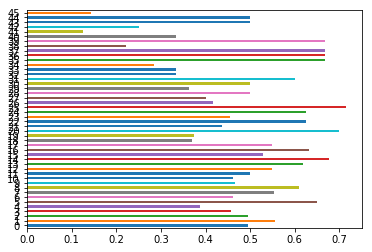

In [120]:
country_count['record'].plot(kind='barh')

In [128]:
homicide_data = 'C:/Users/Benjamin Robson/Documents/Homicide_rate_by_country.csv'
crime = pd.read_csv(homicide_data)
crime

,country,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Average
0,Burundi,-,NaN,NaN,NaN,NaN,3.87,4.11,3.67,3.56,4.45,3.97,4.03,NaN,3.951428571
1,Comoros,-,NaN,9.43,NaN,NaN,NaN,NaN,8.42,NaN,NaN,NaN,NaN,7.6,8.483333333
2,Djibouti,-,NaN,8.16,NaN,NaN,NaN,NaN,7.6,NaN,NaN,NaN,NaN,6.77,7.51
3,Eritrea,-,NaN,9.11,NaN,NaN,NaN,NaN,8.3,NaN,NaN,NaN,NaN,7.46,8.29
4,Ethiopia,-,NaN,9.42,NaN,NaN,NaN,NaN,8.47,NaN,NaN,NaN,NaN,7.6,8.496666667
5,Kenya,-,4.05,3.56,3.54,3.44,3.69,5.65,5.55,6.38,6.49,6.59,5.9,5.75,5.049166667
6,Madagascar,-,0.73,1.78,4.63,3,3.06,0.69,0.62,NaN,NaN,NaN,NaN,NaN,2.072857143
7,Malawi,2.48,3.31,1.57,6.26,5.11,5.61,2.23,3.52,2.25,1.78,NaN,NaN,NaN,3.412
8,Mauritius,-,NaN,NaN,NaN,NaN,NaN,3.06,2.64,2.71,NaN,NaN,NaN,NaN,2.803333333
9,Mayotte,-,NaN,NaN,0.54,14.2,2.55,5.93,NaN,NaN,NaN,NaN,NaN,NaN,5.805


In [129]:
crime_average = crime[['country','Average']]

In [130]:
country_record_crime = pd.merge(country_count, crime_average, on='country', how = 'left')
country_record_crime

,country,wins,losses,total matches,record,Average
0,United States,2199,2248,4447,0.494491,5.131538462
1,Brazil,547,438,985,0.555330,24.69777778
2,Canada,184,187,371,0.495957,1.736923077
3,England,111,132,243,0.456790,1.265833333
4,Japan,75,118,193,0.388601,0.426666667
5,Russia,52,28,80,0.650000,13.535
6,Australia,48,56,104,0.461538,1.214615385
7,Netherlands,36,29,65,0.553846,0.897692308
8,South Korea,28,18,46,0.608696,0.7825
9,Sweden,27,31,58,0.465517,0.966153846


In [159]:
country_record_crime = country_record_crime.rename(columns={'Average': 'average homicide rate per 100,000 (2003-2015)'})

In [188]:
assault = 'C:/Users/Benjamin Robson/Documents/un_assault_data.csv'
assault_data = pd.read_csv(assault)   

In [189]:
assault_data = assault_data[['Country', 'average assault rate per 100,000 people (2003-2015)']]  

In [190]:
assault_data = assault_data.rename(columns = {'Country':'country'})

In [191]:
record_hom_assault = pd.merge(country_record_crime, assault_data, on = 'country', how = 'left')

In [192]:
record_hom_assault = record_hom_assault.drop(['average assault rate per 100,000 people (2003-2015)_y', 'average assault rate per 100,000 people (2003-2015)_x'], axis = 1)

In [193]:
record_hom_assault

,country,wins,losses,total matches,record,"average homicide rate per 100,000 (2003-2015)","average assault rate per 100,000 people (2003-2015)"
0,United States,2199,2248,4447,0.494491,5.131538462,263.623077
1,Brazil,547,438,985,0.555330,24.69777778,343.511250
2,Canada,184,187,371,0.495957,1.736923077,158.084615
3,England,111,132,243,0.456790,1.265833333,759.337500
4,Japan,75,118,193,0.388601,0.426666667,34.650000
5,Russia,52,28,80,0.650000,13.535,27.240000
6,Australia,48,56,104,0.461538,1.214615385,296.293750
7,Netherlands,36,29,65,0.553846,0.897692308,362.126154
8,South Korea,28,18,46,0.608696,0.7825,449.106667
9,Sweden,27,31,58,0.465517,0.966153846,476.070000


In [194]:
gdp = 'C:/Users/Benjamin Robson/Documents/world_bank_gdp_ppp.csv'
gdp_ppp = pd.read_csv(gdp) 

In [199]:
gdp_ppp = gdp_ppp.rename(columns= {'Country Name': 'country', 'avg' : 'gdp ppp (average 2003-2015)'})

In [201]:
gdp_ppp_avg = gdp_ppp[['country', 'gdp ppp (average 2003-2015)' ]]

In [203]:
final = pd.merge(record_hom_assault, gdp_ppp_avg, on = 'country', how = 'left')

In [245]:
final['average homicide rate per 100,000 (2003-2015)'] = final['average homicide rate per 100,000 (2003-2015)'].astype(float)

In [247]:
final_x = final.set_index(['country'])

In [251]:
final_x

,wins,losses,total matches,record,"average homicide rate per 100,000 (2003-2015)","average assault rate per 100,000 people (2003-2015)",gdp ppp (average 2003-2015)
country,,,,,,,
United States,2199,2248,4447,0.494491,5.131538,263.623077,48411.632740
Brazil,547,438,985,0.555330,24.697778,343.511250,8588.027429
Canada,184,187,371,0.495957,1.736923,158.084615,43634.300120
England,111,132,243,0.456790,1.265833,759.337500,42401.250010
Japan,75,118,193,0.388601,0.426667,34.650000,39617.631390
Russia,52,28,80,0.650000,13.535000,27.240000,9889.298925
Australia,48,56,104,0.461538,1.214615,296.293750,48158.685090
Netherlands,36,29,65,0.553846,0.897692,362.126154,47933.323840
South Korea,28,18,46,0.608696,0.782500,449.106667,21750.785270


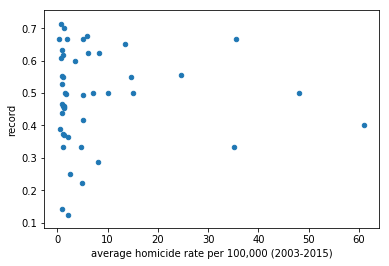

In [249]:
fig, ax = plt.subplots()
final_x.plot(x='average homicide rate per 100,000 (2003-2015)', y ='record', ax=ax, kind='scatter')

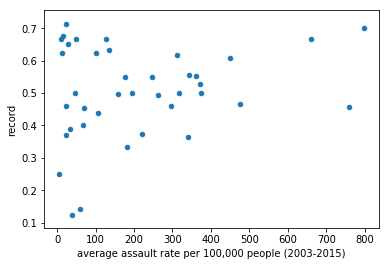

In [250]:
fig, ax = plt.subplots()
final_x.plot(x='average assault rate per 100,000 people (2003-2015)', y ='record', ax=ax, kind='scatter')

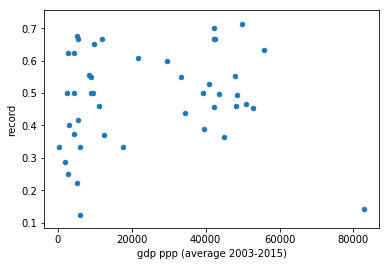

In [252]:
fig, ax = plt.subplots()
final_x.plot(x='gdp ppp (average 2003-2015)', y ='record', ax=ax, kind='scatter')

In [ ]:
import statsmodels.api as sm # import statsmodels 

X = final_x["RM"] ## X usually means our input variables (or independent variables)
y = target["MEDV"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

In [221]:
country_method = ufc1[['f1country', 'method_d']]

In [222]:
country_method = country_method.rename(columns = {'f1country':'country'})

In [260]:
country_method.pivot(index=country_method.index, columns='method_d')['country']

method_d,nan,Accidental Clash of Heads,Accidental Eye Poke,Accidental Foul,Accidental Head-butt,Achilles Lock,Anaconda Choke,Ankle Injury,Arm Injury,Arm Triangle Choke,...,Suplex and Punches,Thumb Injury,Toe Hold,Triangle Armbar,Triangle Choke,Triangle Kimura,Twister,Unanimous,Upkick and Punches,Wheel Kick and Punches
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [276]:
country_method['method_d'].value_counts().to_frame().head(15)

,method_d
Unanimous,1142
Punches,699
Split,308
Rear-Naked Choke,252
Guillotine Choke,134
Punch,126
Armbar,85
Triangle Choke,49
Doctor Stoppage,41
Arm-Triangle Choke,34
